# Exploratory Data Analysis (Startup Fundings)

In [1]:
## This dataset has funding information of the Indian startups from January 2015 to August 2017. ##
## All The Problem Statements With Their Solutions are Given Below

In [7]:
# Loading Data
import pandas as pd
data=pd.read_csv("startup_funding.csv")
df=data.copy()
df      ##  2372 rows × 10 columns ## 

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


## Problem Statement1 :
Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
Print year-wise total number of fundings also. Print years in ascending order.

In [17]:
new = df["Date"].str.split("/", n = 1, expand = True)
df["Date1"]=new[1]
new1=df["Date1"].str.split("/", n = 1, expand = True)
df["Year"]=new1[1]
print(df["Year"].value_counts())

2016     993
2015     931
2017     443
/2015      1
Name: Year, dtype: int64


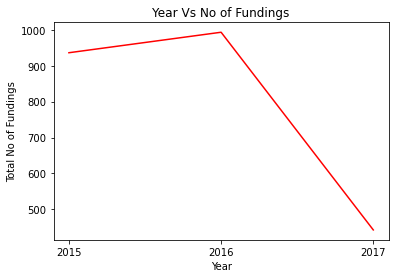

In [25]:
# Plotiing Line Graph
import matplotlib.pyplot as plt
year=[2015,2016,2017] # 2015 = 936
total=[936,993,443]
plt.plot(year,total,'r-')
#plt.axis([2015,2017,400,1000])
plt.xlabel("Year")
plt.ylabel("Total No of Fundings")
plt.title("Year Vs No of Fundings")
plt.xticks(year)
plt.show()


## Problem Statement 2 :
Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.
### Note :
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the number of startups.

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


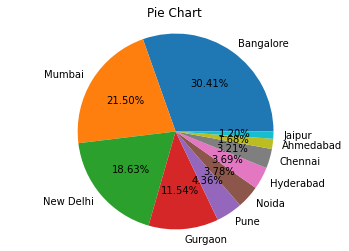

In [66]:
df['CityLocation'].dropna(inplace = True)
# df['CityLocation'] = df['CityLocation'].apply(seprateCity)
new = df["CityLocation"].str.split(" / ", n = 1, expand = True)
# print(new[1].value_counts())
df["NewCity"]=new[0]
df['NewCity'].replace('Delhi','New Delhi',inplace = True)
df['NewCity'].replace('bangalore','Bangalore',inplace = True)
city = df['NewCity'].value_counts()[:10]
city
city_index = city.index
num_city=[635,449,389,241,91,79,77,67,35,25]
for i in range(10):
    print(city_index[i],num_city[i])
plt.title('Pie Chart')
plt.pie(num_city,labels = city_index,autopct="%0.2f%%")
plt.axis('equal')
plt.show()

## Problem Statement 3 :
Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
### Note :
Ecommerce is the right word in IndustryVertical, so correct it.
Print the industry in descending order with respect to the percentage of the amount funded.

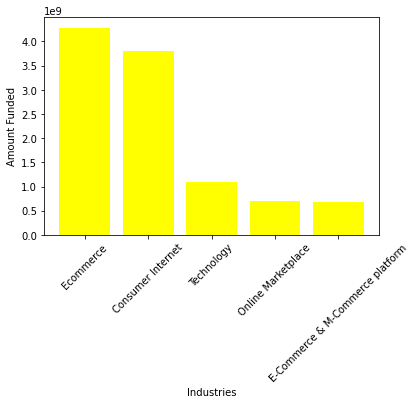

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [90]:
# Open and read data file as specified in the question
# Print the required output in given format
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'
df.drop(df['SNo'].loc[df.IndustryVertical.isnull()], inplace=True)

np_industry=np.array(df.IndustryVertical)
np_amount=np.array(df.AmountInUSD)
np_industry[np_industry=='eCommerce']='Ecommerce'
np_industry[np_industry=='ECommerce']='Ecommerce'
np_industry[np_industry=='ecommerce']='Ecommerce'

for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')

dic=dict()
for i in range(len(np_amount)):
    if np_industry[i] in dic.keys():
        dic[np_industry[i]]+=np_amount[i]
    else:
        dic[np_industry[i]]=np_amount[i]
xaxis=[]
yaxis=[]

for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

# plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='yellow')
plt.xticks(rotation=45)
plt.xlabel('Industries')
plt.ylabel('Amount Funded')
plt.yticks()
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis) , '.2f'))

## Problem Statement 4 :
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.
### Note:
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the percentage of funding.

In [112]:
data=pd.read_csv("startup_funding.csv")
df=data.copy()
df.isnull().sum()
df.drop(["Remarks"],axis=1,inplace=True)
# df["CityLocation"].dropna(inplace=True)
df.fillna(" ",inplace=True)
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,,,,Asia Pacific Internet Group,Private Equity,"4,500,000"
2368,2368,29/01/2015,Graphene,,,,KARSEMVEN Fund,Private Equity,"825,000"
2369,2369,30/01/2015,Mad Street Den,,,,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000"
2370,2370,30/01/2015,Simplotel,,,,MakeMyTrip,Private Equity,


In [121]:
# df['CityLocation'].dropna(inplace = True)
def seprateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(seprateCity)
df['CityLocation'].replace('Delhi','New Delhi',inplace = True)
df['CityLocation'].replace('bangalore','Bangalore',inplace = True)
final_df=df[df["AmountInUSD"]!=" "]
final_df=final_df[final_df["CityLocation"]!='']
final_df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000"
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000"
...,...,...,...,...,...,...,...,...,...
2195,2195,29/04/2015,Icertis,Cloud Enterprise Software,,Pune,"Greycroft Partners, Fidelity Growth Partners",Private Equity,"6,000,000"
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,,Bangalore,SAIF Partners,Private Equity,"3,500,000"
2198,2198,29/04/2015,Tradelab,Financial Markets Software,,Bangalore,Rainmatter,Seed Funding,"400,000"
2199,2199,29/04/2015,PiQube,Hiring Analytics platform,,Chennai,The HR Fund,Seed Funding,"500,000"


In [132]:
def f(string):
    string = string.replace('.', '')
    string = string.replace(',', '')
    return float(string)
final_df["AmountInUSD"]=final_df["AmountInUSD"].apply(f)
final_df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000.0
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,2600000.0
...,...,...,...,...,...,...,...,...,...
2195,2195,29/04/2015,Icertis,Cloud Enterprise Software,,Pune,"Greycroft Partners, Fidelity Growth Partners",Private Equity,6000000.0
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,,Bangalore,SAIF Partners,Private Equity,3500000.0
2198,2198,29/04/2015,Tradelab,Financial Markets Software,,Bangalore,Rainmatter,Seed Funding,400000.0
2199,2199,29/04/2015,PiQube,Hiring Analytics platform,,Chennai,The HR Fund,Seed Funding,500000.0


In [142]:
# Finding Top 10 Cities in Recieving Fundings
import numpy as np
fundings=np.array(final_df["AmountInUSD"],dtype=float)
city=np.array(final_df["CityLocation"])
ans={}
for i in range(len(city)):
    if city[i] in ans.keys():
        ans[city[i]]+=fundings[i]
    else:
        ans[city[i]]=fundings[i]
sort_orders = sorted(ans.items(), key=lambda x: x[1], reverse=True)
city1=[]
total1=[]
i=0
for row in sort_orders:
    if i!=10:
        city1.append(row[0])
        total1.append(row[1])
        i+=1
    else:
        break
city1
total1

[8422974108.0,
 2818247500.0,
 2354934500.0,
 2069021500.0,
 411105000.0,
 366653000.0,
 195362000.0,
 170638000.0,
 98186000.0,
 35560000.0]

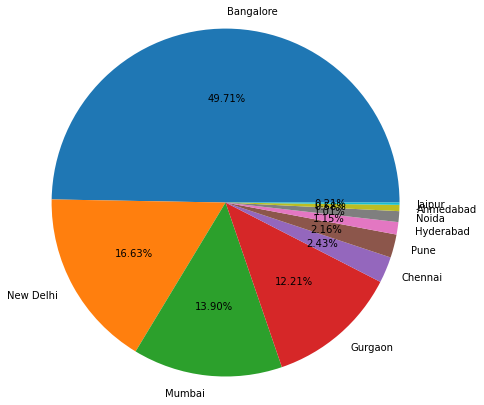

In [149]:
# Pie Chart for Percentages
plt.pie(total1,labels=city1,radius=2,autopct="%0.2f%%")
# plt.title("Top Cities With Most Fundings")
plt.show()
percentage=[49.71,16.63,13.90,12.21,2.43,2.16,1.15,1.01,0.58,0.21] # Required Percentages

## Problem Statement 5:
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
### Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.


In [158]:
# Data Cleaning
import pandas as pd
data=pd.read_csv("startup_funding.csv")
df=data.copy()
df.isnull().sum()
df.fillna(" ",inplace=True)
df.isnull().sum()
df.drop("Remarks",axis=1,inplace=True)
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,,,,Asia Pacific Internet Group,Private Equity,"4,500,000"
2368,2368,29/01/2015,Graphene,,,,KARSEMVEN Fund,Private Equity,"825,000"
2369,2369,30/01/2015,Mad Street Den,,,,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000"
2370,2370,30/01/2015,Simplotel,,,,MakeMyTrip,Private Equity,


In [173]:
# data cleaning related to InvestmentType
df["InvestmentType"].unique()
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)
df["InvestmentType"].unique()
final_df=df[df["InvestmentType"]!=" "]
# final_df["InvestmentType"].unique()
final_df=final_df[final_df["AmountInUSD"]!=" "]

In [174]:
def f(string):
    string = string.replace('.', '')
    string = string.replace(',', '')
    return float(string)
final_df["AmountInUSD"]=final_df["AmountInUSD"].apply(f)

In [179]:
import numpy as np
fundings=np.array(final_df["AmountInUSD"],dtype=float)
type1=np.array(final_df["InvestmentType"])
ans={}
for i in range(len(fundings)):
    if type1[i] in ans.keys():
        ans[type1[i]]+=fundings[i]
    else:
        ans[type1[i]]=fundings[i]
sort_orders = sorted(ans.items(), key=lambda x: x[1], reverse=True)
type2=[]
total=[]
for row in sort_orders:
    type2.append(row[0])
    total.append(row[1])

[18007085000.0, 332345708.0, 7800000.0, 155768.0]

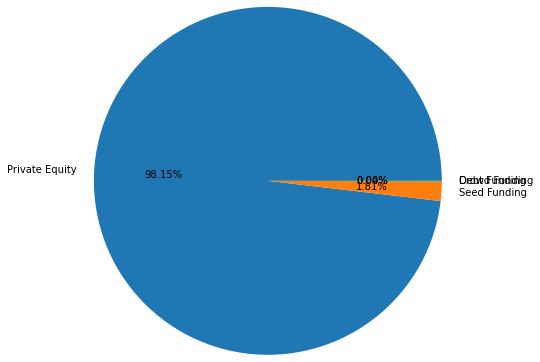

In [186]:
# Pie Chart for Percentage Calculation
plt.pie(total,labels=type2,radius=2,autopct="%0.2f%%")
plt.show()
percentage=[98.15,1.81,0.04,0.00] # Required Percentages

## Problem Statement 6 :
Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.
### Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [187]:
# Data Cleaning 
import pandas as pd
data=pd.read_csv("startup_funding.csv")
df=data.copy()
df.fillna(" ",inplace=True)
df.drop("Remarks",axis=1,inplace=True)
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,,,,Asia Pacific Internet Group,Private Equity,"4,500,000"
2368,2368,29/01/2015,Graphene,,,,KARSEMVEN Fund,Private Equity,"825,000"
2369,2369,30/01/2015,Mad Street Den,,,,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000"
2370,2370,30/01/2015,Simplotel,,,,MakeMyTrip,Private Equity,


In [196]:
# Data Cleaning For selected Companies
df["StartupName"].unique()
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,,,,Asia Pacific Internet Group,Private Equity,"4,500,000"
2368,2368,29/01/2015,Graphene,,,,KARSEMVEN Fund,Private Equity,"825,000"
2369,2369,30/01/2015,Mad Street Den,,,,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000"
2370,2370,30/01/2015,Simplotel,,,,MakeMyTrip,Private Equity,


In [197]:
final_df=df[df["StartupName"]!=" "]
# final_df["InvestmentType"].unique()
final_df=final_df[final_df["AmountInUSD"]!=" "]
final_df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000"
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000"
...,...,...,...,...,...,...,...,...,...
2366,2366,28/01/2015,Grabhouse.com,,,,"Kalaari Capital, Sequoia Capital",Private Equity,"2,500,000"
2367,2367,29/01/2015,Printvenue,,,,Asia Pacific Internet Group,Private Equity,"4,500,000"
2368,2368,29/01/2015,Graphene,,,,KARSEMVEN Fund,Private Equity,"825,000"
2369,2369,30/01/2015,Mad Street Den,,,,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000"


In [198]:
def f(string):
    string = string.replace('.', '')
    string = string.replace(',', '')
    return float(string)
final_df["AmountInUSD"]=final_df["AmountInUSD"].apply(f)

In [201]:
import numpy as np
fundings=np.array(final_df["AmountInUSD"],dtype=float)
name=np.array(final_df["StartupName"])
ans={}
for i in range(len(fundings)):
    if name[i] in ans.keys():
        ans[name[i]]+=fundings[i]
    else:
        ans[name[i]]=fundings[i]
sort_orders = sorted(ans.items(), key=lambda x: x[1], reverse=True)
print(sort_orders)
topcom=["Paytm","Flipkart","Ola","Snapdeal","Oyo"]

[('Paytm', 2340000000.0), ('Flipkart', 2259700000.0), ('Ola', 1899500000.0), ('Snapdeal', 700000000.0), ('Oyo', 637000000.0), ('Quikr', 230000000.0), ('Delhivery', 215000000.0), ('Foodpanda', 210000000.0), ('BigBasket', 207000000.0), ('MakeMyTrip', 180000000.0), ('Hike', 175000000.0), ('Swiggy', 170500000.0), ('Grofers', 165000000.0), ('Byju’s', 160000000.0), ('CarTrade', 145000000.0), ('FreeCharge', 137000000.0), ('Ecom Express', 137000000.0), ('Pepperfry', 131300000.0), ('Rivigo', 120000000.0), ('Shopclues', 107700000.0), ('Fractal Analytics', 100000000.0), ('Inmobi', 100000000.0), ('Saavn', 100000000.0), ('ShopClues', 100000000.0), ('Mobikwik', 90000000.0), ('practo', 90000000.0), ('YepMe', 88700000.0), ('Practo', 85000000.0), ('Zomato', 85000000.0), ('BookMyShow', 82000000.0), ('Chillr', 76000000.0), ('Meru Cabs', 75000000.0), ('BillDesk', 75000000.0), ('Ace2three', 73700000.0), ('Blackbuck', 70000000.0), ('Urban Ladder', 65200000.0), ('Infogain', 63000000.0), ('UrbanClap', 6070000

## Problem Statement 7 :
Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.
### Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [203]:
# Data Cleaning
import pandas as pd
data=pd.read_csv("startup_funding.csv")
df=data.copy()
df.fillna(" ",inplace=True)
df.drop("Remarks",axis=1,inplace=True)
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,,,,Asia Pacific Internet Group,Private Equity,"4,500,000"
2368,2368,29/01/2015,Graphene,,,,KARSEMVEN Fund,Private Equity,"825,000"
2369,2369,30/01/2015,Mad Street Den,,,,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000"
2370,2370,30/01/2015,Simplotel,,,,MakeMyTrip,Private Equity,


In [204]:
df["StartupName"].unique()
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
final_df=df[df["StartupName"]!=" "]
final_df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,,,,Asia Pacific Internet Group,Private Equity,"4,500,000"
2368,2368,29/01/2015,Graphene,,,,KARSEMVEN Fund,Private Equity,"825,000"
2369,2369,30/01/2015,Mad Street Den,,,,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000"
2370,2370,30/01/2015,Simplotel,,,,MakeMyTrip,Private Equity,


Ola          9
Swiggy       7
UrbanClap    6
Paytm        6
Oyo          6
Name: StartupName, dtype: int64


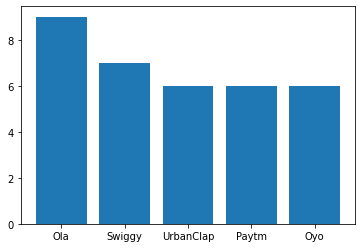

In [207]:
# Top 5 startups with most no of fundings
print(final_df["StartupName"].value_counts()[0:5])
com=["Ola","Swiggy","UrbanClap","Paytm","Oyo"]
value=[9,7,6,6,6]
plt.bar(com,value)
plt.show()

## Problem Statement 8 :
Find the Investors who have invested maximum number of times.
Print the investor name and number of times invested as integer value.
### Note:
In startup, multiple investors might have invested. So consider each investor for that startup.
Ignore the undisclosed investors.

In [212]:
# Data Cleaning And 
import pandas as pd
df=pd.read_csv('startup_funding.csv')
x=df["InvestorsName"]
x.dropna(inplace=True)
x=x.values

0                                             Kae Capital
1                              Triton Investment Advisors
2       Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...
3       Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...
4                          Narottam Thudi, Shireesh Palle
                              ...                        
2367                          Asia Pacific Internet Group
2368                                       KARSEMVEN Fund
2369                       Exfinity Fund, GrowX Ventures.
2370                                           MakeMyTrip
2371                    UK based Group of Angel Investors
Name: InvestorsName, Length: 2372, dtype: object


In [213]:
d={}
for i in range(len(x)):
    
    l=x[i].split(',')
    for j in range(len(l)):
        if l[j].strip() in d:
            d[l[j].strip()]+=1
        else:
            d[l[j].strip()]=1
key_list=list(d.keys())
value_list=list(d.values())
maxi=max(value_list)
maxi_index=value_list.index(maxi)
print(key_list[maxi_index],maxi)

Sequoia Capital 64
